In [1]:
import shap
import keras
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Flatten, Input, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

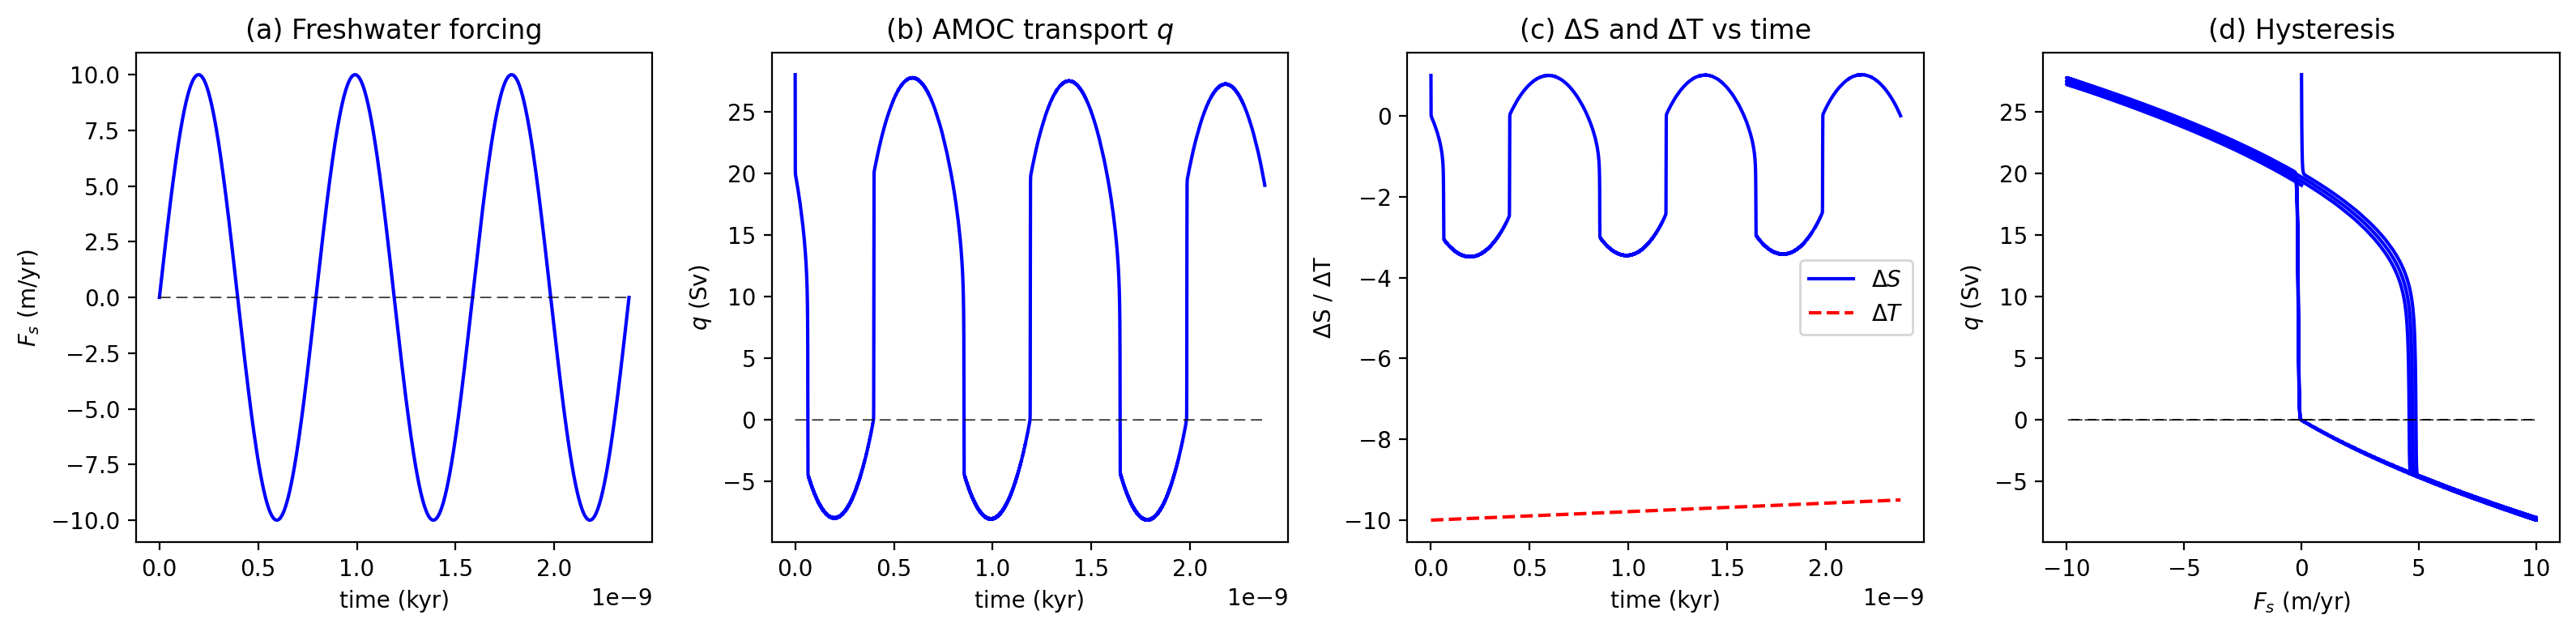

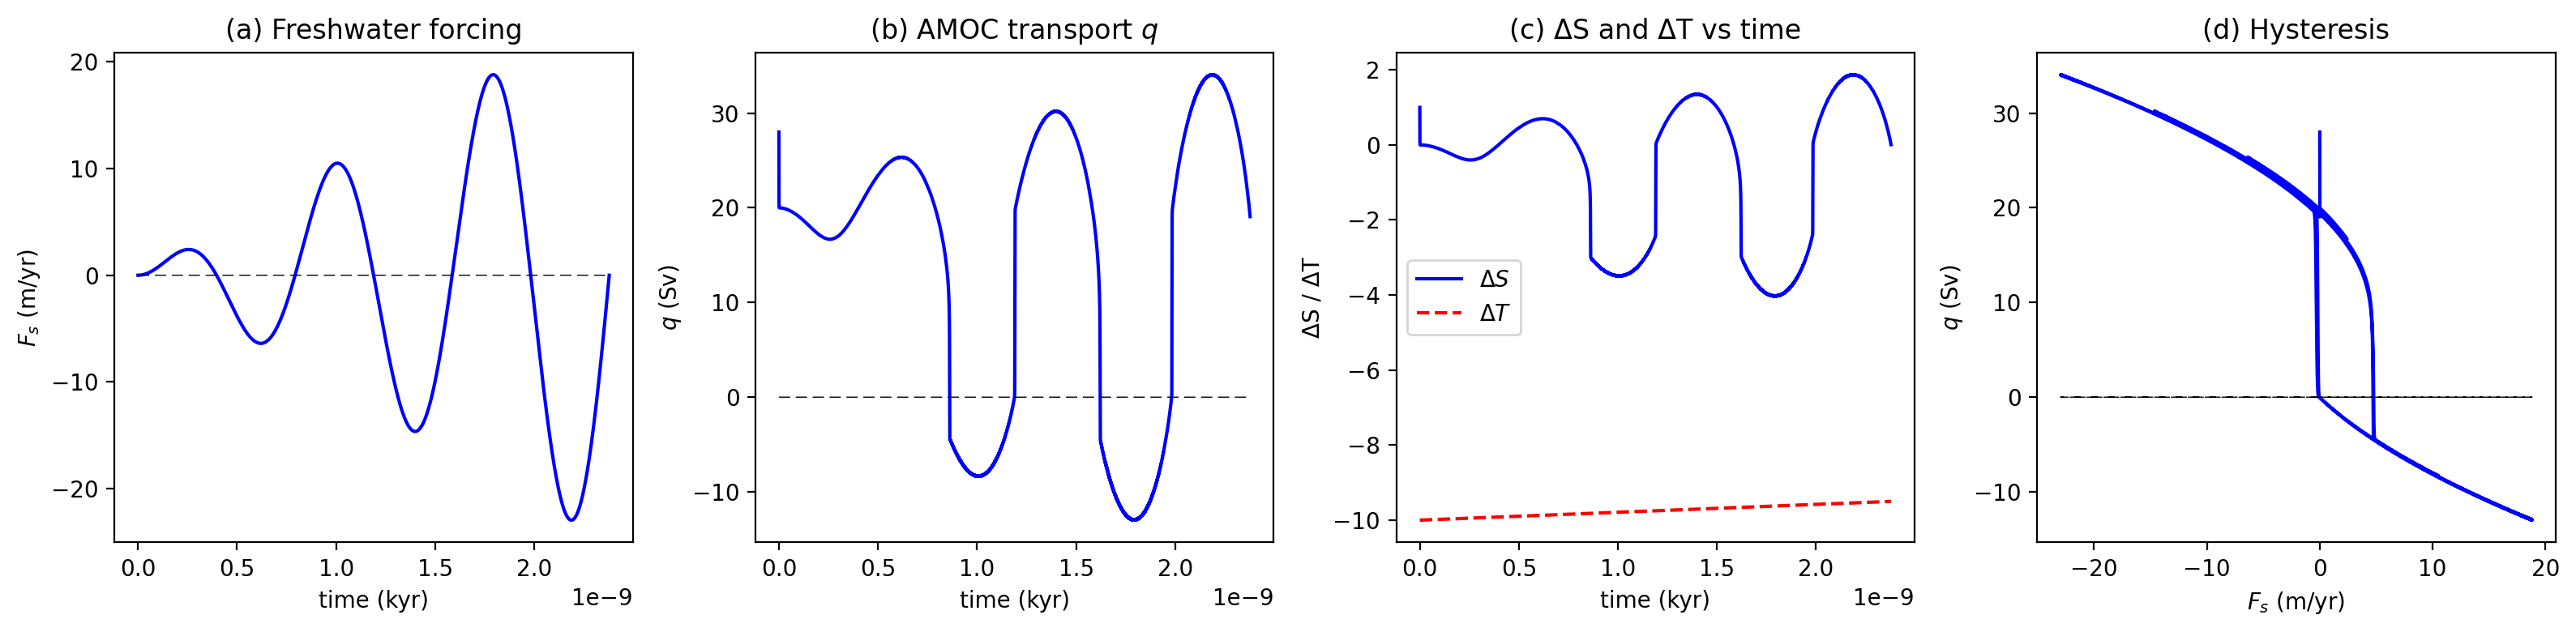

In [3]:
%run 00_generate_data.ipynb

In [4]:
input_data, output_data, qplot = get_data("s")

In [5]:
X_train = input_data[0:60032]
y_train = output_data[0:60032]

X_val = input_data[61024:81000]
y_val = output_data[61024:81000]

X_test = input_data[81992:100000]
y_test = output_data[81992:100000]

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
input_scaled = scaler.transform(input_data)

In [45]:
background_data = shap.kmeans(X_train_scaled, 50)

np.random.seed(42)
sample_indices = np.random.choice(input_scaled.shape[0], size=1000, replace=False)
input_sample = input_scaled[sample_indices]
shap_values_list = []
feature_names = ['Time', 'Salinity Difference', 'Temperature Difference', 'Freshwater Forcing']

In [8]:
models = []
for i in range(12):
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.load_weights(f'models/mlp/stationary/ensemble_member_{i}.keras')
    models.append(model)

In [9]:
for i, model in enumerate(models):
    print(f"Computing SHAP for model {i}")
    explainer = shap.KernelExplainer(model.predict, background_data, feature_names=feature_names)
    shap_values = explainer.shap_values(input_sample)
    shap_values_list.append(shap_values)

Computing SHAP for model 0
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 926us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 943us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 841us/step


22/22 [==============================] - 0s 999us/step


22/22 [==============================] - 0s 851us/step


22/22 [==============================] - 0s 948us/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 1


2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 874us/step


22/22 [==============================] - 0s 998us/step


1/1 [==============================] - 0s 19ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 20ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 917us/step


22/22 [==============================] - 0s 886us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 883us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 969us/step


22/22 [==============================] - 0s 780us/step
Computing SHAP for model 2
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 931us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 903us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 790us/step


22/22 [==============================] - 0s 919us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 958us/step


22/22 [==============================] - 0s 869us/step
Computing SHAP for model 3
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 935us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 944us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 850us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 862us/step


22/22 [==============================] - 0s 850us/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 937us/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 4
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 985us/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


22/22 [==============================] - 0s 864us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 817us/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 27ms/step


22/22 [==============================] - 0s 720us/step


22/22 [==============================] - 0s 814us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 975us/step
Computing SHAP for model 5
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 24ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 998us/step


22/22 [==============================] - 0s 897us/step
Computing SHAP for model 6
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 910us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 847us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 932us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 870us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 888us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 932us/step
Computing SHAP for model 7
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 916us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 718us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 887us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 869us/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 917us/step
Computing SHAP for model 8
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 880us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 876us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 9
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 821us/step


1/1 [==============================] - 0s 14ms/step


22/22 [==============================] - 0s 793us/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 881us/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 859us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 864us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 844us/step
Computing SHAP for model 10
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 950us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 937us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 888us/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 910us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 886us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 903us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 11
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 832us/step


1/1 [==============================] - 0s 18ms/step


22/22 [==============================] - 0s 922us/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 904us/step


1/1 [==============================] - 0s 19ms/step


22/22 [==============================] - 0s 1ms/step


In [10]:
shap_values_list_np = np.array(shap_values_list)

In [13]:
len(shap_values_list)

12

In [15]:
incorrect_indices_s = np.load('test_indices/incorrect_indices_mlp_s.npy')

In [18]:
overlapping_indices = np.intersect1d(sample_indices, incorrect_indices_s)

In [16]:
# Assuming you have incorrect_indices and shap_values_list
correct_mask = np.ones(len(input_sample), dtype=bool)
correct_mask[incorrect_indices_s] = False

# For each ensemble member
for i in range(12):
    shap_values = shap_values_list[i]
    
    # Plot correct predictions
    shap.summary_plot(shap_values[correct_mask], 
                     input_sample[correct_mask], 
                     feature_names=feature_names,
                     title=f"Model {i} - Correct Predictions")
    
    # Plot incorrect predictions  
    shap.summary_plot(shap_values[incorrect_indices_s], 
                     input_sample[incorrect_indices_s],
                     feature_names=feature_names, 
                     title=f"Model {i} - Incorrect Predictions")

IndexError: index 83343 is out of bounds for axis 0 with size 1000

In [22]:
incorrect_samples = input_data[incorrect_indices_s]

In [23]:
shap_for_incorrect = []
for i, model in enumerate(models):
    print(f"Computing SHAP for model {i}")
    explainer = shap.KernelExplainer(model.predict, background_data, feature_names=feature_names)
    shap_values = explainer.shap_values(incorrect_samples)
    shap_for_incorrect.append(shap_values)

Computing SHAP for model 0
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 988us/step
Computing SHAP for model 1
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 2ms/step
Computing SHAP for model 2
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 2ms/step
Computing SHAP for model 3
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 893us/step
Computing SHAP for model 4
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 866us/step
Computing SHAP for model 5
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 767us/step
Computing SHAP for model 6
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 7
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 839us/step
Computing SHAP for model 8
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 9
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 10
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 11
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

22/22 [==============================] - 0s 972us/step


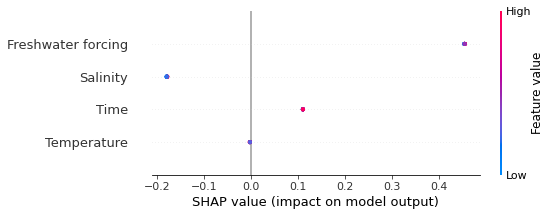

In [30]:
# Remove singleton dimension and average across ensemble
shap_ensemble_mean = np.array(shap_for_incorrect).squeeze(axis=1).mean(axis=0)  # Shape: (25, 4)

shap.summary_plot(shap_ensemble_mean, 
                 input_scaled[incorrect_indices_s], 
                 feature_names=['Time', 'Salinity', 'Temperature', 'Freshwater forcing'],
                 title="Mean SHAP Values Across Ensemble - Incorrect Predictions")

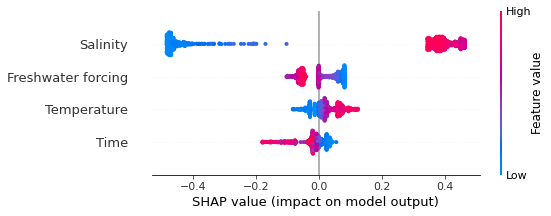

In [32]:
# Remove singleton dimension and average across ensemble
shap_ensemble_mean = np.array(shap_values_list_np).squeeze(axis=1).mean(axis=0)  # Shape: (25, 4)

shap.summary_plot(shap_ensemble_mean, 
                 input_sample, 
                 feature_names=['Time', 'Salinity', 'Temperature', 'Freshwater forcing'],
                 title="Mean SHAP Values Across Ensemble - Incorrect Predictions")

In [39]:
raw_input_sample = input_data[sample_indices]
qsample = qplot[sample_indices]

In [35]:
shap_ensemble_mean.shape

(1000, 4)

In [36]:
shap_temp_mean = shap_ensemble_mean[:, 2]
shap_sal_mean = shap_ensemble_mean[:, 1]

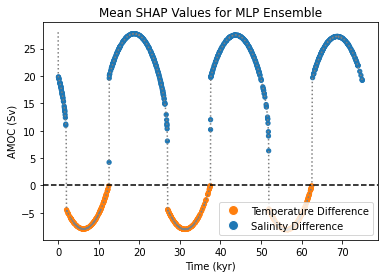

In [42]:
fig, ax = plt.subplots()

# Create color array
colors = np.where(shap_temp_mean > shap_sal_mean, '#ff7f0e', '#1f77b4')

# Single scatter call
scatter = ax.scatter(raw_input_sample[:, 0], qsample/Sv, 
                    c=colors, marker='o', s=18)

ax.set_xlabel('Time (kyr)')
ax.set_ylabel('AMOC (Sv)')
ax.set_title('Mean SHAP Values for MLP Ensemble')
ax.plot(input_data[:, 0], qplot/Sv, linestyle=':', color='grey')
ax.axhline(0, color='black', linestyle='--')

# Manual legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#ff7f0e', markersize=10),
                 plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#1f77b4', markersize=10)]
ax.legend(legend_handles, ['Temperature Difference', 'Salinity Difference'], 
          loc='lower right')

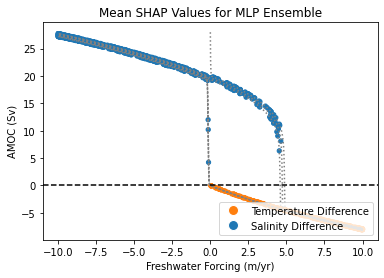

In [43]:
fig, ax = plt.subplots()

# Create color array
colors = np.where(shap_temp_mean > shap_sal_mean, '#ff7f0e', '#1f77b4')

# Single scatter call
scatter = ax.scatter(raw_input_sample[:, 3]/Fs_to_m_per_year, qsample/Sv, 
                    c=colors, marker='o', s=18)

ax.set_xlabel('Freshwater Forcing (m/yr)')
ax.set_ylabel('AMOC (Sv)')
ax.set_title('Mean SHAP Values for MLP Ensemble')
ax.plot(input_data[:, 3]/Fs_to_m_per_year, qplot/Sv, linestyle=':', color='grey')
ax.axhline(0, color='black', linestyle='--')

# Manual legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#ff7f0e', markersize=10),
                 plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#1f77b4', markersize=10)]
ax.legend(legend_handles, ['Temperature Difference', 'Salinity Difference'], 
          loc='lower right')

In [54]:
# Your existing sample indices (1000 points)
# sample_indices = np.random.choice(input_scaled.shape[0], size=1000, replace=False)

# Find tipping region samples
tipping_mask = (qplot/Sv >= 0) & (qplot/Sv <= 20)
tipping_indices = np.where(tipping_mask)[0]

# Remove any overlap with existing sample
available_tipping = np.setdiff1d(tipping_indices, sample_indices)

# Add 200 more tipping samples (adjust as needed)
if len(available_tipping) > 500:
    additional_tipping = np.random.choice(available_tipping, size=500, replace=False)
else:
    additional_tipping = available_tipping

# Combine samples
enhanced_sample_indices = np.concatenate([sample_indices, additional_tipping])
print(f"Enhanced sample: {len(enhanced_sample_indices)} points ({len(sample_indices)} original + {len(additional_tipping)} tipping)")

Enhanced sample: 1500 points (1000 original + 500 tipping)


In [55]:
shap_for_tipping = []
for i, model in enumerate(models):
    print(f"Computing SHAP for model {i}")
    explainer = shap.KernelExplainer(model.predict, background_data, feature_names=feature_names)
    shap_values = explainer.shap_values(input_data[additional_tipping])
    shap_for_tipping.append(shap_values)

Computing SHAP for model 0
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

22/22 [==============================] - 0s 975us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 768us/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 873us/step


22/22 [==============================] - 0s 846us/step
Computing SHAP for model 1
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 885us/step


22/22 [==============================] - 0s 922us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 929us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 880us/step
Computing SHAP for model 2
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


22/22 [==============================] - 0s 921us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 838us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 858us/step


22/22 [==============================] - 0s 842us/step
Computing SHAP for model 3
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 948us/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


22/22 [==============================] - 0s 886us/step
Computing SHAP for model 4
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 939us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 876us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 854us/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 5
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 880us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 927us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 905us/step


22/22 [==============================] - 0s 919us/step
Computing SHAP for model 6
2/2 [==============================] - 0s 4ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 925us/step


22/22 [==============================] - 0s 973us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 876us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 951us/step
Computing SHAP for model 7
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 959us/step


22/22 [==============================] - 0s 864us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 8
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 9
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 839us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 816us/step


22/22 [==============================] - 0s 722us/step
Computing SHAP for model 10
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 760us/step


22/22 [==============================] - 0s 3ms/step


22/22 [==============================] - 0s 900us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 798us/step
Computing SHAP for model 11
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 2ms/step


1/1 [==============================] - 0s 21ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 2ms/step


In [77]:
# Fix concatenation - needs parentheses for arrays, not individual arrays
shap_ensemble_mean = np.concatenate([
    np.array(shap_for_tipping).squeeze(axis=1).mean(axis=0), 
    np.array(shap_values_list_np).squeeze(axis=1).mean(axis=0)
])

shap_temp_mean = shap_ensemble_mean[:, 2]
shap_sal_mean = shap_ensemble_mean[:, 1]

# Fix concatenation for input data and qplot too
raw_input_sample = np.concatenate([input_data[additional_tipping], input_data[sample_indices]])
qsample = np.concatenate([qplot[additional_tipping], qplot[sample_indices]])

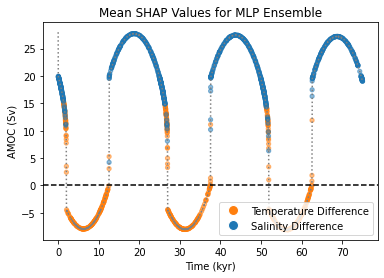

In [78]:
fig, ax = plt.subplots()

# Create color array
colors = np.where(shap_temp_mean > shap_sal_mean, '#ff7f0e', '#1f77b4')

# Single scatter call
scatter = ax.scatter(raw_input_sample[:, 0], qsample/Sv, 
                    c=colors, marker='o', s=18, alpha=0.5)

ax.set_xlabel('Time (kyr)')
ax.set_ylabel('AMOC (Sv)')
ax.set_title('Mean SHAP Values for MLP Ensemble')
ax.plot(input_data[:, 0], qplot/Sv, linestyle=':', color='grey')
ax.axhline(0, color='black', linestyle='--')

# Manual legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#ff7f0e', markersize=10),
                 plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#1f77b4', markersize=10)]
ax.legend(legend_handles, ['Temperature Difference', 'Salinity Difference'], 
          loc='lower right')

In [91]:
# Fix concatenation - needs parentheses for arrays, not individual arrays
shap_ensemble_mean = np.array(shap_for_tipping).squeeze(axis=1).mean(axis=0)

shap_temp_mean = shap_ensemble_mean[:, 2]
shap_sal_mean = shap_ensemble_mean[:, 1]

# Fix concatenation for input data and qplot too
raw_input_sample = input_data[additional_tipping]
qsample = qplot[additional_tipping]

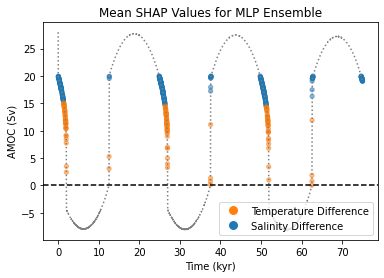

In [92]:
fig, ax = plt.subplots()

# Create color array
colors = np.where(shap_temp_mean > shap_sal_mean, '#ff7f0e', '#1f77b4')

# Single scatter call
scatter = ax.scatter(raw_input_sample[:, 0], qsample/Sv, 
                    c=colors, marker='o', s=18, alpha=0.5)

ax.set_xlabel('Time (kyr)')
ax.set_ylabel('AMOC (Sv)')
ax.set_title('Mean SHAP Values for MLP Ensemble')
ax.plot(input_data[:, 0], qplot/Sv, linestyle=':', color='grey')
ax.axhline(0, color='black', linestyle='--')

# Manual legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#ff7f0e', markersize=10),
                 plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#1f77b4', markersize=10)]
ax.legend(legend_handles, ['Temperature Difference', 'Salinity Difference'], 
          loc='lower right')

In [93]:
# Fix concatenation - needs parentheses for arrays, not individual arrays
shap_ensemble_mean = np.array(shap_values_list_np).squeeze(axis=1).mean(axis=0)

shap_temp_mean = shap_ensemble_mean[:, 2]
shap_sal_mean = shap_ensemble_mean[:, 1]

# Fix concatenation for input data and qplot too
raw_input_sample = input_data[sample_indices]
qsample = qplot[sample_indices]

In [94]:
# Create color array
colors = np.where(shap_temp_mean > shap_sal_mean, '#ff7f0e', '#1f77b4')

# Single scatter call
scatter = ax.scatter(raw_input_sample[:, 0], qsample/Sv, 
                    c=colors, marker='o', s=18, alpha=0.5)

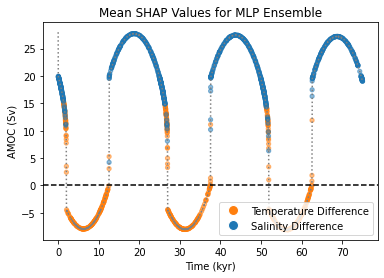

In [95]:
fig

In [96]:
overlap = np.intersect1d(additional_tipping, sample_indices)
print(f"Number of overlapping indices: {len(overlap)}")
print(f"Overlapping indices: {overlap}")

Number of overlapping indices: 0
Overlapping indices: []


In [108]:
# Combine regime-based and transition-focused sampling
stable_high = (qplot/Sv > 20)
stable_cycles = (qplot/Sv > 10) & (qplot/Sv <= 20)
critical_zone = np.abs(qplot/Sv) <= 5
transition_zones = ((qplot/Sv > 5) & (qplot/Sv <= 10))

# Weight sampling toward scientifically interesting regions
weights = {
    'stable_high': (stable_high, 100),
    'stable_cycles': (stable_cycles, 150), 
    'transitions': (transition_zones, 200),
    'critical': (critical_zone, 300)  # Most important for your research
}

sample_indices = []
for name, (mask, n_samples) in weights.items():
    regime_indices = np.where(mask)[0]
    if len(regime_indices) > 0:
        n_sample = min(n_samples, len(regime_indices))
        regime_sample = np.random.choice(regime_indices, size=n_sample, replace=False)
        sample_indices.extend(regime_sample)

sample_indices = np.array(sample_indices)

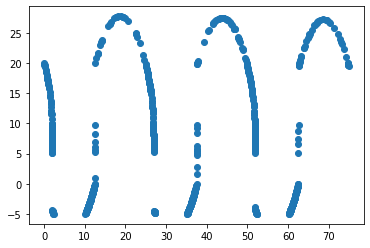

In [109]:
plt.scatter(input_data[sample_indices, 0], qplot[sample_indices]/Sv)

In [115]:
# More samples where AMOC changes rapidly (derivatives)
qplot_smooth = qplot/Sv
q_gradient = np.abs(np.gradient(qplot_smooth))

# Higher sampling probability where gradient is high
gradient_probs = q_gradient / q_gradient.sum()
density_sample_indices = np.random.choice(len(qplot), size=1000, replace=False, p=gradient_probs)

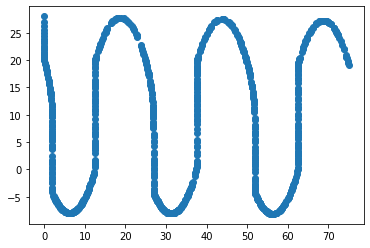

In [116]:
plt.scatter(input_data[density_sample_indices, 0], qplot[density_sample_indices]/Sv)

In [117]:
shap_well_distributed = []
for i, model in enumerate(models):
    print(f"Computing SHAP for model {i}")
    explainer = shap.KernelExplainer(model.predict, background_data, feature_names=feature_names)
    shap_values = explainer.shap_values(input_data[density_sample_indices])
    shap_well_distributed.append(shap_values)

Computing SHAP for model 0
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 853us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 897us/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 954us/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 782us/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 1
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 892us/step


22/22 [==============================] - 0s 967us/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 871us/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 879us/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 948us/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 2
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 957us/step


22/22 [==============================] - 0s 929us/step


22/22 [==============================] - 0s 773us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 944us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 738us/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 3
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 982us/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 975us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 973us/step


1/1 [==============================] - 0s 20ms/step


22/22 [==============================] - 0s 873us/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 23ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 4
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 971us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 975us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 879us/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 870us/step
Computing SHAP for model 5


2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 766us/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 895us/step


22/22 [==============================] - 0s 772us/step


1/1 [==============================] - 0s 18ms/step


22/22 [==============================] - 0s 866us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 823us/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 840us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 953us/step
Computing SHAP for model 6
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 890us/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 19ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 23ms/step


22/22 [==============================] - 0s 894us/step


1/1 [==============================] - 0s 18ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 18ms/step


22/22 [==============================] - 0s 914us/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 7
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 18ms/step


22/22 [==============================] - 0s 889us/step


1/1 [==============================] - 0s 21ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 23ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 23ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 18ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 8
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 19ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 9
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 15ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 10
2/2 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 24ms/step


22/22 [==============================] - 0s 900us/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step
Computing SHAP for model 11
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

22/22 [==============================] - 0s 958us/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 17ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


22/22 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 19ms/step


22/22 [==============================] - 0s 1ms/step


In [180]:
np.save('shap_mlp_s', np.array(shap_well_distributed))

In [118]:
# Fix concatenation - needs parentheses for arrays, not individual arrays
shap_ensemble_mean = np.array(shap_well_distributed).squeeze(axis=1).mean(axis=0)

shap_temp_mean = shap_ensemble_mean[:, 2]
shap_sal_mean = shap_ensemble_mean[:, 1]

# Fix concatenation for input data and qplot too
raw_input_sample = input_data[density_sample_indices]
qsample = qplot[density_sample_indices]

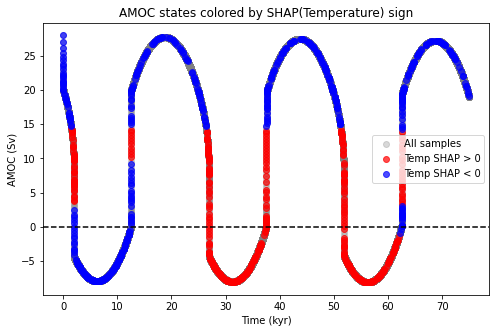

In [150]:
# Indices for positive and negative SHAP values
pos_idx = np.where(shap_temp_mean > 0)[0]
neg_idx = np.where(shap_temp_mean < 0)[0]

plt.figure(figsize=(8,5))

# Base scatter: all points
plt.scatter(input_data[:, 0], qplot/Sv, color='grey', alpha=0.3, label='All samples')

# Highlight positive SHAP (temperature drives AMOC up)
plt.scatter(raw_input_sample[pos_idx, 0], qsample[pos_idx]/Sv, 
            color='red', alpha=0.7, label='Temp SHAP > 0')

# Highlight negative SHAP (temperature drives AMOC down)
plt.scatter(raw_input_sample[neg_idx, 0], qsample[neg_idx]/Sv, 
            color='blue', alpha=0.7, label='Temp SHAP < 0')

plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Time (kyr)")
plt.ylabel("AMOC (Sv)")
plt.title("AMOC states colored by SHAP(Temperature) sign")
plt.legend()
plt.show()


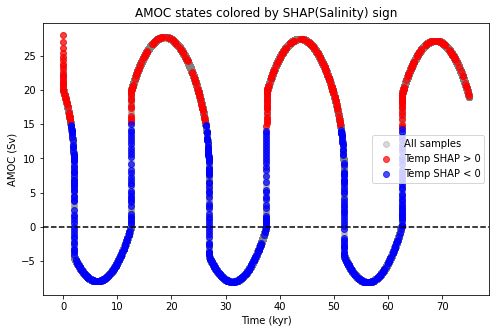

In [151]:
# Indices for positive and negative SHAP values
pos_idx = np.where(shap_sal_mean > 0)[0]
neg_idx = np.where(shap_sal_mean < 0)[0]

plt.figure(figsize=(8,5))

# Base scatter: all points
plt.scatter(input_data[:, 0], qplot/Sv, color='grey', alpha=0.3, label='All samples')

# Highlight positive SHAP (temperature drives AMOC up)
plt.scatter(raw_input_sample[pos_idx, 0], qsample[pos_idx]/Sv, 
            color='red', alpha=0.7, label='Temp SHAP > 0')

# Highlight negative SHAP (temperature drives AMOC down)
plt.scatter(raw_input_sample[neg_idx, 0], qsample[neg_idx]/Sv, 
            color='blue', alpha=0.7, label='Temp SHAP < 0')

plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Time (kyr)")
plt.ylabel("AMOC (Sv)")
plt.title("AMOC states colored by SHAP(Salinity) sign")
plt.legend()
plt.show()


In [181]:
opposite_idx = np.where(shap_temp_mean * shap_sal_mean < 0)[0]
same_sign_idx = np.where(shap_temp_mean * shap_sal_mean > 0)[0]

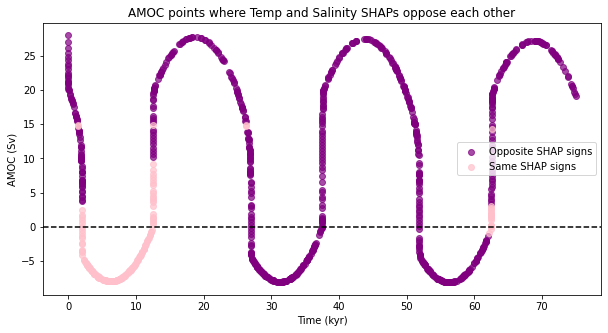

In [182]:
plt.figure(figsize=(10,5))
plt.scatter(raw_input_sample[opposite_idx, 0], qsample[opposite_idx]/Sv,
            color='purple', marker='o', alpha=0.7, label='Opposite SHAP signs')
plt.scatter(raw_input_sample[same_sign_idx, 0], qsample[same_sign_idx]/Sv,
            color='pink', marker='o', alpha=0.7, label='Same SHAP signs')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Time (kyr)")
plt.ylabel("AMOC (Sv)")
plt.title("AMOC points where Temp and Salinity SHAPs oppose each other")
plt.legend()
plt.show()


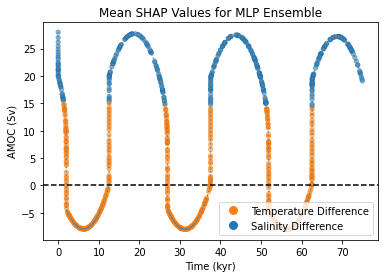

In [137]:
fig, ax = plt.subplots()

# Create color array
colors = np.where(shap_temp_mean > shap_sal_mean, '#ff7f0e', '#1f77b4')

# Single scatter call
scatter = ax.scatter(raw_input_sample[:, 0], qsample/Sv, 
                    c=colors, marker='o', s=18, alpha=0.5)

ax.set_xlabel('Time (kyr)')
ax.set_ylabel('AMOC (Sv)')
ax.set_title('Mean SHAP Values for MLP Ensemble')
ax.plot(input_data[:, 0], qplot/Sv, linestyle=':', color='grey')
ax.axhline(0, color='black', linestyle='--')

# Manual legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#ff7f0e', markersize=10),
                 plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#1f77b4', markersize=10)]
ax.legend(legend_handles, ['Temperature Difference', 'Salinity Difference'], 
          loc='lower right')

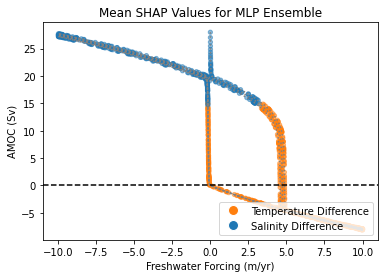

In [121]:
fig, ax = plt.subplots()

# Create color array
colors = np.where(shap_temp_mean > shap_sal_mean, '#ff7f0e', '#1f77b4')

# Single scatter call
scatter = ax.scatter(raw_input_sample[:, 3]/Fs_to_m_per_year, qsample/Sv, 
                    c=colors, marker='o', s=18, alpha=0.5)

ax.set_xlabel('Freshwater Forcing (m/yr)')
ax.set_ylabel('AMOC (Sv)')
ax.set_title('Mean SHAP Values for MLP Ensemble')
ax.plot(input_data[:, 3]/Fs_to_m_per_year, qplot/Sv, linestyle=':', color='grey')
ax.axhline(0, color='black', linestyle='--')

# Manual legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#ff7f0e', markersize=10),
                 plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#1f77b4', markersize=10)]
ax.legend(legend_handles, ['Temperature Difference', 'Salinity Difference'], 
          loc='lower right')

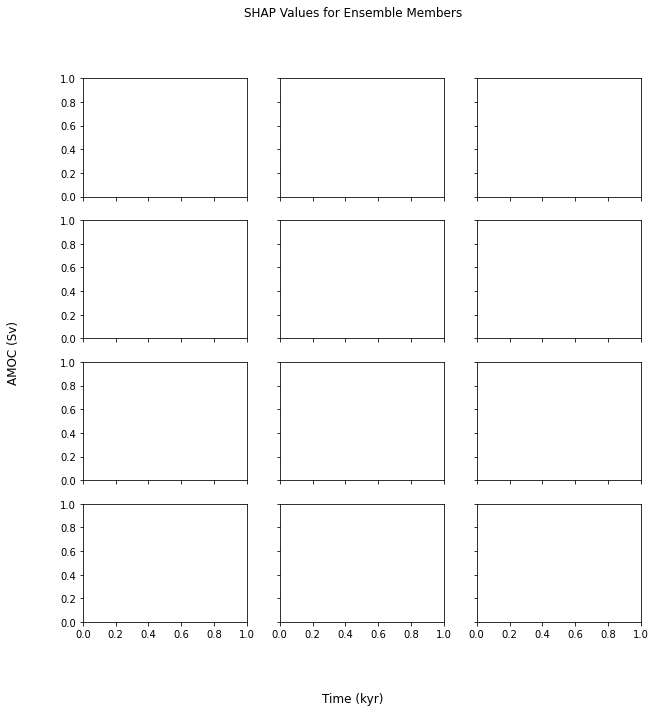

In [127]:
fig, ax = plt.subplots(4, 3, sharex = True, sharey = True, figsize = (10, 10))
fig.supxlabel('Time (kyr)')
fig.supylabel('AMOC (Sv)')
fig.suptitle('SHAP Values for Ensemble Members')
ax = ax.flatten()

In [128]:
for i in range(12):
    shap_i = np.array(shap_well_distributed)[i, 0, :, :]
    shap_temp = shap_i[:, 2]
    shap_sal = shap_i[:, 1]
    colors = np.where(shap_temp > shap_sal, '#ff7f0e', '#1f77b4')

    scatter = ax[i].scatter(raw_input_sample[:, 0], qsample/Sv, 
                            c=colors, marker='o', s=18, alpha=0.5)
    ax[i].plot(input_data[:, 0], qplot/Sv, linestyle=':', color='grey')
    ax[i].axhline(0, color='black', linestyle='--')

# After the loop: figure-level legend
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', 
               markerfacecolor='#ff7f0e', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', 
               markerfacecolor='#1f77b4', markersize=10)
]
fig.legend(legend_handles, ['Temperature Difference', 'Salinity Difference'], 
           loc='lower right')

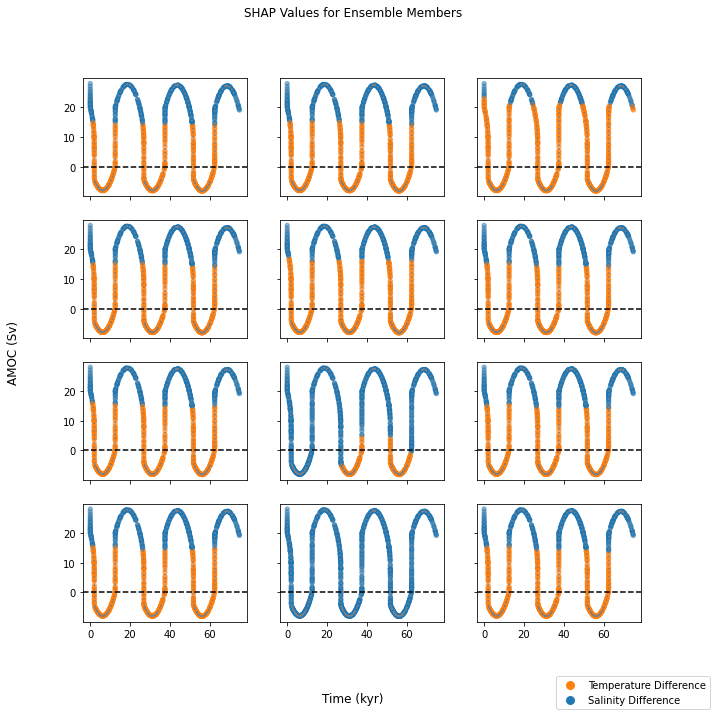

In [129]:
fig

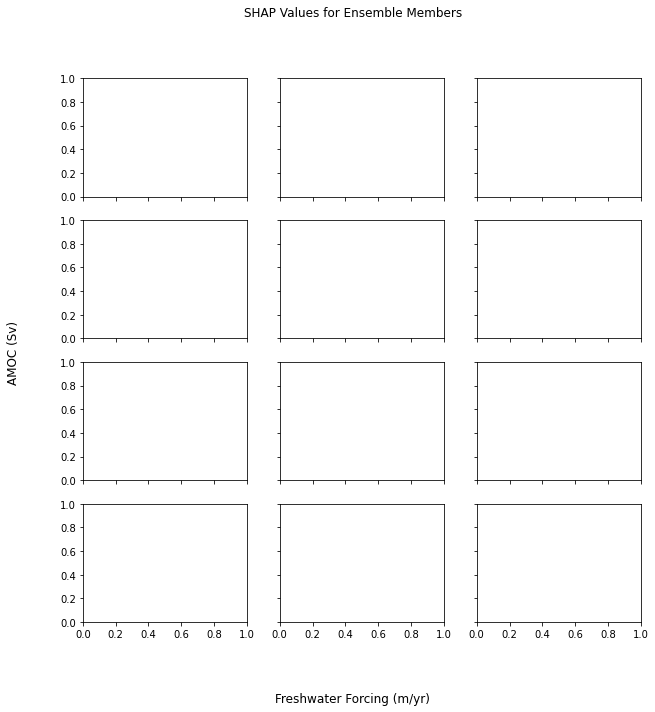

In [131]:
fig, ax = plt.subplots(4, 3, sharex = True, sharey = True, figsize = (10, 10))
fig.supxlabel('Freshwater Forcing (m/yr)')
fig.supylabel('AMOC (Sv)')
fig.suptitle('SHAP Values for Ensemble Members')
ax = ax.flatten()

In [132]:
for i in range(12):
    shap_i = np.array(shap_well_distributed)[i, 0, :, :]
    shap_temp = shap_i[:, 2]
    shap_sal = shap_i[:, 1]
    colors = np.where(shap_temp > shap_sal, '#ff7f0e', '#1f77b4')

    scatter = ax[i].scatter(raw_input_sample[:, 3]/Fs_to_m_per_year, qsample/Sv, 
                            c=colors, marker='o', s=18, alpha=0.5)
    ax[i].plot(input_data[:, 3]/Fs_to_m_per_year, qplot/Sv, linestyle=':', color='grey')
    ax[i].axhline(0, color='black', linestyle='--')

# After the loop: figure-level legend
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', 
               markerfacecolor='#ff7f0e', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', 
               markerfacecolor='#1f77b4', markersize=10)
]
fig.legend(legend_handles, ['Temperature Difference', 'Salinity Difference'], 
           loc='lower right')

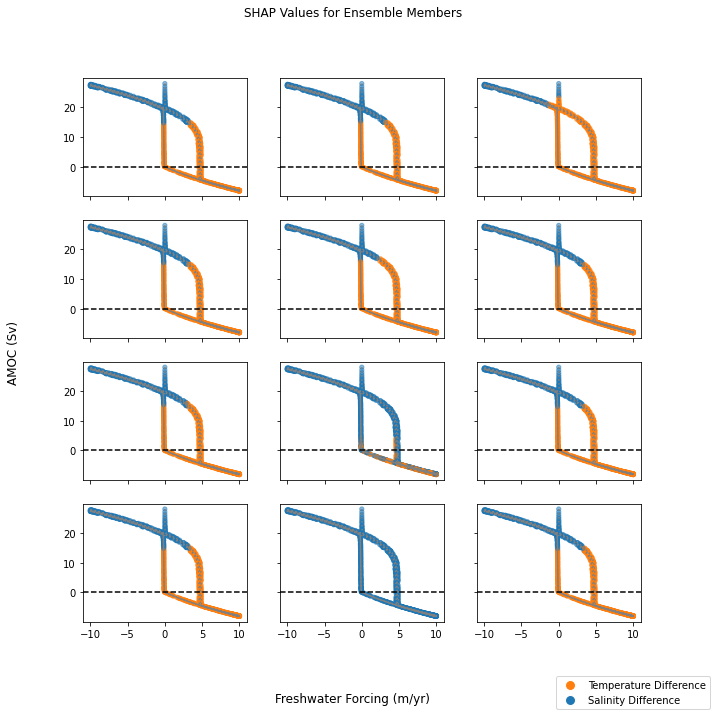

In [133]:
fig

In [187]:
input_sample.shape

(1000, 4)

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


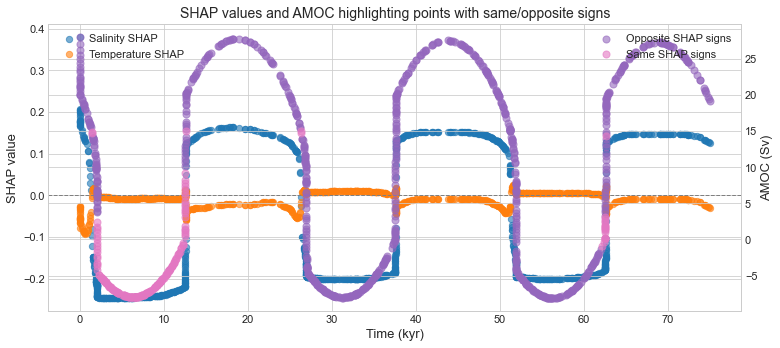

In [216]:
import matplotlib.pyplot as plt
import matplotlib

# Set style for a clean, professional look
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update({'font.size': 12})

fig, ax1 = plt.subplots(figsize=(11,5))

# Plot SHAP values
ax1.scatter(raw_input_sample[:,0], shap_ensemble_mean[:,1], 
            label='Salinity SHAP', color='#1f77b4', alpha=0.6, s=40)  # softer blue
ax1.scatter(raw_input_sample[:,0], shap_ensemble_mean[:,2], 
            label='Temperature SHAP', color='#ff7f0e', alpha=0.6, s=40)  # softer orange

# Zero line for SHAP reference
ax1.axhline(0, color='grey', linestyle='--', linewidth=1)
ax1.set_xlabel("Time (kyr)", fontsize=13)
ax1.set_ylabel("SHAP value", fontsize=13)
ax1.tick_params(axis='both', which='major', labelsize=11)
ax1.legend(loc='upper left', fontsize=11)

# Secondary axis for AMOC
ax2 = ax1.twinx()
ax2.scatter(raw_input_sample[opposite_idx,0], qsample[opposite_idx]/Sv,
            color='#9467bd', marker='o', alpha=0.6, s=50, label='Opposite SHAP signs')  # muted purple
ax2.scatter(raw_input_sample[same_sign_idx,0], qsample[same_sign_idx]/Sv,
            color='#e377c2', marker='o', alpha=0.6, s=50, label='Same SHAP signs')  # muted pink

ax2.set_ylabel("AMOC (Sv)", fontsize=13)
ax2.tick_params(axis='y', labelsize=11)
ax2.legend(loc='upper right', fontsize=11)

plt.title("SHAP values and AMOC highlighting points with same/opposite signs", fontsize=14)
plt.tight_layout()
plt.show()


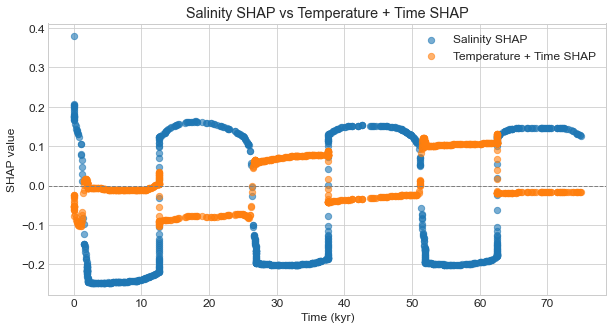

In [217]:
# Combine temperature and time SHAP values
shap_temp_time = shap_ensemble_mean[:,2] + shap_ensemble_mean[:,0]

plt.figure(figsize=(10,5))
plt.scatter(raw_input_sample[:,0], shap_ensemble_mean[:,1], color='#1f77b4', alpha=0.6, s=40, label='Salinity SHAP')
plt.scatter(raw_input_sample[:,0], shap_temp_time, color='#ff7f0e', alpha=0.6, s=40, label='Temperature + Time SHAP')
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.xlabel("Time (kyr)")
plt.ylabel("SHAP value")
plt.title("Salinity SHAP vs Temperature + Time SHAP")
plt.legend()
plt.show()


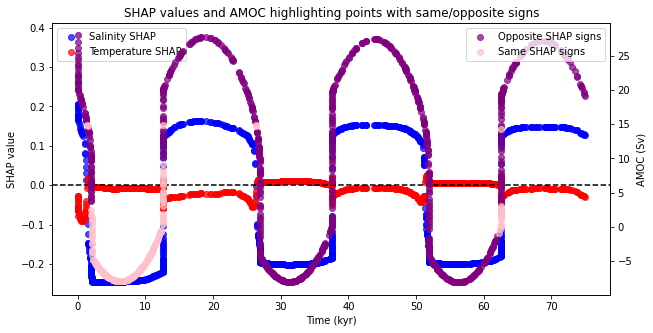

In [214]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,5))

# Plot SHAP values
ax1.scatter(raw_input_sample[:,0], shap_ensemble_mean[:,1], label='Salinity SHAP', color='blue', alpha=0.7)
ax1.scatter(raw_input_sample[:,0], shap_ensemble_mean[:,2], label='Temperature SHAP', color='red', alpha=0.7)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_xlabel("Time (kyr)")
ax1.set_ylabel("SHAP value")
ax1.legend(loc='upper left')

# Secondary axis: AMOC
ax2 = ax1.twinx()
ax2.scatter(raw_input_sample[opposite_idx,0], qsample[opposite_idx]/Sv,
            color='purple', marker='o', alpha=0.7, label='Opposite SHAP signs')
ax2.scatter(raw_input_sample[same_sign_idx,0], qsample[same_sign_idx]/Sv,
            color='pink', marker='o', alpha=0.7, label='Same SHAP signs')
ax2.set_ylabel("AMOC (Sv)")
ax2.legend(loc='upper right')

plt.title("SHAP values and AMOC highlighting points with same/opposite signs")
plt.show()


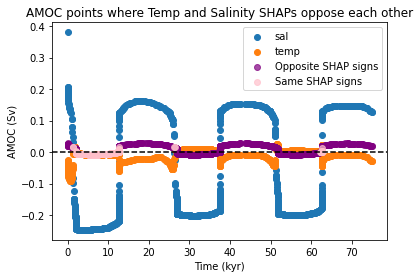

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


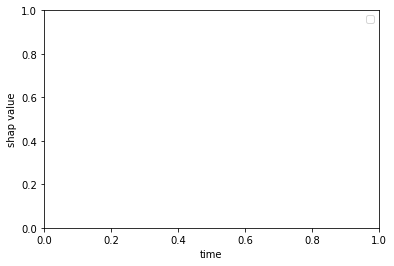

In [212]:
plt.scatter(raw_input_sample[:, 0], shap_ensemble_mean[:, 1], label='sal')
plt.scatter(raw_input_sample[:, 0], shap_ensemble_mean[:, 2], label='temp')
plt.scatter(raw_input_sample[opposite_idx, 0], qsample[opposite_idx]/1e12,
            color='purple', marker='o', alpha=0.7, label='Opposite SHAP signs')
plt.scatter(raw_input_sample[same_sign_idx, 0], qsample[same_sign_idx]/1e12,
            color='pink', marker='o', alpha=0.7, label='Same SHAP signs')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Time (kyr)")
plt.ylabel("AMOC (Sv)")
plt.title("AMOC points where Temp and Salinity SHAPs oppose each other")
plt.legend()
plt.show()

plt.xlabel('time')
plt.ylabel('shap value')
plt.legend()

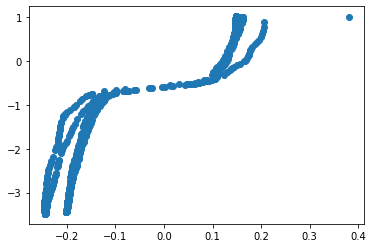

In [196]:
plt.scatter(shap_ensemble_mean[:, 1], raw_input_sample[:, 1])


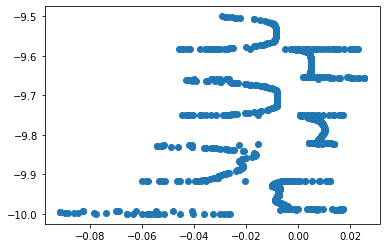

In [197]:
plt.scatter(shap_ensemble_mean[:, 2], raw_input_sample[:, 2])

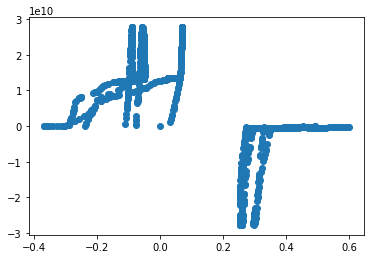

In [198]:
plt.scatter(shap_ensemble_mean[:, 3], raw_input_sample[:, 3])

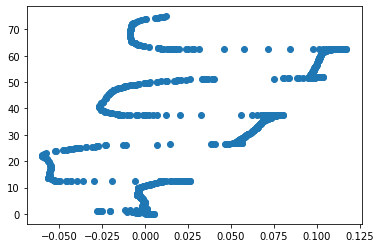

In [201]:
plt.scatter(shap_ensemble_mean[:, 0], raw_input_sample[:, 0])